Скачиваем CSV

In [39]:
import gdown

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_id = '17pteRBAI82tEnE59UQxcaPub0IoW1lefJ7PakV8RZZw'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv'

output = 'data.csv'

DATA_LINK = "https://drive.google.com/drive/folders/1Qj5lBN0mKEADR4Dzek5t43d_2BCaDSBz?usp=sharing"

gdown.download(url, output, quiet=False)

/home/dan11l/.local/lib/python3.13/site-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/17pteRBAI82tEnE59UQxcaPub0IoW1lefJ7PakV8RZZw/export?format=csv
To: /mnt/e/Programming/ML/hse-cw-2025/data.csv
101MB [00:03, 25.7MB/s] 


'data.csv'

In [40]:
data = pd.read_csv('data.csv')
data.isna().mean()

id                      0.000000
price                   0.000000
area                    0.000000
rooms                   0.000000
ceilingHeight           0.336986
kitchen_space           0.000000
floor                   0.000000
floorsTotal             0.000000
creationDate            0.000000
seller                  0.000000
address                 0.000000
nearest_metro           0.000000
time_to_metro           0.000000
transport_to_metro      0.000000
branch_metro_color      0.000000
parks_count             0.000000
nearest_park            0.623868
time_park               0.623868
distance_park           0.623868
ponds_count             0.000000
nearest_pond            0.360272
time_pond               0.360272
distance_pond           0.360272
nearest_airport         0.004067
time_airport_via_car    0.004067
distance_airport        0.004067
images                  0.000000
dtype: float64

In [41]:
data.nearest_airport.unique()

array(['Пулково', nan], dtype=object)

Бесполезный столбец - удаляем

In [42]:
data = data.drop('nearest_airport', axis=1)

Удаляем столбец id - бесполезный

In [43]:
data = data.drop('id', axis=1)

В столбцах про парк > 60% пропусков - просто удалим

In [44]:
data = data.drop(['distance_park', 'time_park', 'nearest_park'], axis=1)

In [45]:
data.rooms.unique()

array(['studio', '1', '2', '3', '4', '5', '6', 'plus_7'], dtype=object)

Заменим studio на 0, plus_7 - на 7

In [46]:
def converse(x):
    if (x == 'studio'):
        return '0'
    if (x == 'plus_7'):
        return '7'
    return x

In [47]:
data['rooms'] = data.rooms.apply(converse)

In [48]:
data.rooms.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype=object)

Поставим настройку, чтобы все столбцы выводились

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
data.sample(10)

price    area rooms  ceilingHeight kitchen_space  floor  \
13123   8830000   28.20     1           2.74           9.3      6   
23757  13242368   40.96     1           2.82         17.45     12   
41425  30000000   94.50     3           2.80          17.4      5   
43246  20459320   82.10     3           2.75          10.9      8   
27977  10406754   54.63     2            NaN        studio     17   
44432  30287184   84.70     3            NaN         17.54      4   
21716  10800157   32.74     1           2.75         15.52     11   
39202  11300000   57.60     3            NaN           6.1      7   
2039    7100000   28.60     0           2.87        studio      7   
43312  20472132  110.70     3           2.75          15.7     12   

       floorsTotal          creationDate         seller  \
13123          6.0  2025-02-01T11:45:38Z         AGENCY   
23757         18.0  2025-05-28T12:47:03Z      DEVELOPER   
41425          9.0  2025-02-06T03:28:46Z  PRIVATE_AGENT   
43246          8.0  2024-03-13T12:55:29Z      DEVELOPER   
27977         17.0  2025-05-15T10:33:08Z      DEVELOPER   
44432          9.0  2023-08-23T15:25:00Z      DEVELOPER   
21716         12.0  2025-05-19T08:40:50Z      DEVELOPER   
39202          9.0  2025-06-10T14:55:45Z         AGENCY   
2039          17.0  2025-01-19T16:28:53Z          OWNER   
43312         23.0  2024-04-25T13:13:03Z      DEVELOPER   

                                                                   address  \
13123                      Россия, Санкт-Петербург, улица Коли Томчака, 10   
23757     Россия, Санкт-Петербург, Невский район, муниципальный округ № 54   
41425                    Россия, Санкт-Петербург, Кременчугская улица, 9к2   
43246               Россия, Санкт-Петербург, набережная реки Каменки, 11к1   
27977                             Россия, Санкт-Петербург, Плесецкая улица   
44432              Россия, Санкт-Петербург, набережная реки Смоленки, 8/86   
21716                     Россия, Санкт-Петербург, улица Георгия Чернышёва   
39202                   Россия, Санкт-Петербург, улица Маршала Новикова, 3   
2039                  Россия, Санкт-Петербург, улица Латышских Стрелков, 3   
43312  Россия, Санкт-Петербург, посёлок Парголово, Ольгинская дорога, 3/20   

                nearest_metro  time_to_metro transport_to_metro  \
13123       Московские Ворота            7.0            ON_FOOT   
23757           Улица Дыбенко            9.0            ON_FOOT   
41425       Площадь Восстания           15.0            ON_FOOT   
43246    Проспект Просвещения           39.0       ON_TRANSPORT   
27977  Комендантский проспект           18.0       ON_TRANSPORT   
44432        Василеостровская            9.0            ON_FOOT   
21716                Звёздная           18.0       ON_TRANSPORT   
39202  Комендантский проспект            8.0            ON_FOOT   
2039     Проспект Большевиков            6.0            ON_FOOT   
43312                  Парнас           12.0            ON_FOOT   

      branch_metro_color  parks_count  ponds_count       nearest_pond  \
13123             16bdf0            2            0                NaN   
23757             f07c1d            0            1          река Нева   
41425             f03d2f            0            1    река Монастырка   
43246             16bdf0            1            1       река Каменка   
27977             c063d1            0            2       река Каменка   
44432             23a12c            3            2      река Смоленка   
21716             16bdf0            0            0                NaN   
39202             c063d1            0            1       озеро Долгое   
2039              f07c1d            1            1     река Оккервиль   
43312             16bdf0            1            3  река Старожиловка   

       time_pond  distance_pond  time_airport_via_car  distance_airport  \
13123        NaN            NaN                1943.0           19997.0   
23757      360.0          530.0                21

In [51]:
data[data.address == 'Россия, Санкт-Петербург'].shape[0] / data.shape[0]

0.010615756693705456

Меньше одного процента - лучше удалить. Непонятно, как хорошо заполнить

Можно было бы брать медиану по метро для таких объявлений, но ради одного процента слишком много мороки

In [52]:
data.shape

(46723, 22)

In [53]:
data = data[data.address != 'Россия, Санкт-Петербург']
data.shape

(46227, 22)

Зачем я трогаю адрес - я хочу разбить его на столбцы

Избавимся от общей, незначимой информации

In [54]:
string = 'Россия, Привет'
string.split('Россия,')[1].strip()
data.address = data.address.apply(lambda x: x.split('Россия,')[1].strip())

In [55]:
data.address.sample(10)

26306                Ленинградская область, Всеволожский район, городской посёлок имени Свердлова, Ермаковская улица
4560                 Санкт-Петербург, Невский район, муниципальный округ Рыбацкое, жилой комплекс Живи в Рыбацком, 5
23656                                                       Санкт-Петербург, Невский район, муниципальный округ № 54
40311                                                             Санкт-Петербург, Орлово-Денисовский проспект, 19к1
16022    Ленинградская область, Всеволожское городское поселение, посёлок Ковалёво, жилой комплекс ЛСР Ржевский парк
12916                                                                           Санкт-Петербург, улица Руднева, 14к2
42072                Ленинградская область, Всеволожский район, городской посёлок имени Свердлова, Ермаковская улица
26497                              Санкт-Петербург, Пушкинский район, посёлок Шушары, жилой комплекс Дом на Школьной
45852                                                           

Собираем новый массив данных - поочереди добавляем с адресами

In [56]:
new_data = pd.DataFrame()

Рассмотрим адреса длины 3 - Санкт-Петербург, улица, дом

In [57]:
street_types = [
    'улица', 'проспект', 'линия', 'бульвар', 'переулок', 'шоссе', 
    'набережная', 'площадь', 'проезд', 'тупик', 'аллея', 'тракт', 
    'дорога', 'квартал', 'микрорайон', 'переезд', 'спуск', 'территория', 'проток', 'ЖК', 'комплекс', 'остров'
]

In [58]:
def select_addr(x):
    if (len(str(x).lower().split(',')) < 2):
        return False
    string_street = str(x).lower().split(',')[1].strip()
    for x in street_types:
        if x in string_street:
            return True
    return False

In [59]:
address_mask = data.address.apply(select_addr)

new_data = data[address_mask].copy()
new_data.shape

(30204, 22)

In [60]:
def get_number(x):
    list_of_data = str(x).lower().split(',')
    len_string = len(list_of_data)
    for i in range(2, len_string):
        if any(char.isdigit() for char in list_of_data[i]):
            return list_of_data[i].strip()
    return np.nan

In [61]:
new_data['city'] = new_data['address'].apply(lambda x: x.split(',')[0].strip())
new_data['street'] = new_data['address'].apply(lambda x: x.split(',')[1].strip())
new_data['home'] = new_data['address'].apply(get_number)

In [62]:
new_data[['city', 'street', 'home']].sample(10)

city                          street home
19018  Санкт-Петербург            проспект Большевиков  уч3
7877   Санкт-Петербург   жилой комплекс Витебский Парк   11
28792  Санкт-Петербург  жилой комплекс Дом у Каретного  NaN
5180   Санкт-Петербург           Варфоломеевская улица    6
41539  Санкт-Петербург                   улица Воскова    2
22611  Санкт-Петербург                Пулковское шоссе   30
37327  Санкт-Петербург               Ремесленная улица   17
21447  Санкт-Петербург          Октябрьская набережная  NaN
14899  Санкт-Петербург            Магнитогорская улица  5к3
2561   Санкт-Петербург                 Уральская улица   21

Запоминаем, что мы уже добавили в таблицу

In [63]:
remember_list = ~address_mask

In [64]:
data = data[remember_list]
data.shape[0], new_data.shape[0]

(16023, 30204)

In [65]:
pd.set_option('display.max_colwidth', None)

In [66]:
data.address.sample(10)

21677                                                                             Санкт-Петербург, Петродворцовый район, посёлок Стрельна
26543                                                            Ленинградская область, Всеволожский район, Мурино, Оборонная улица, 33к2
31875                                                                                       Санкт-Петербург, Сестрорецк, Приморское шоссе
39176                                                            Санкт-Петербург, Пушкинский район, посёлок Шушары, Валдайская улица, 4к2
26690       Ленинградская область, Ломоносовский район, Аннинское городское поселение, городской посёлок Новоселье, Центральная улица, 17
46421                                                                                                   Санкт-Петербург, Выборгский район
23692                                                                            Санкт-Петербург, Невский район, муниципальный округ № 54
15672    Ленинградская область, Ло

In [67]:
village_types = ['посёлок', 'посёлок', 'Колпино', 'Пушкин', 'Шушары', 'Мурино', 
                 'Парголово', 'Кронштадт', 'Рыбацкое', 'Сестрорецк', 'Лаголово', 
                 'Деревня', 'Округ', 'Тосно', 'Бугры', 'Петергоф', 'Ломоносов', 'Кудрово',
                 'поселение', 'село', 'Зеленогорск', 'город']

In [68]:
def select_address(x):
    flag_village = False
    flag_street = False
    flag_home = False
    village = ' '
    street = ' '
    number = ' '
    list_of_substrings = str(x).lower().split(',')
    for i in range(len(list_of_substrings)):
        if (not flag_home) & flag_village & flag_street:
            if any(char.isdigit() for char in list_of_substrings[i]):
                number = list_of_substrings[i]
                flag_home = True
        if (not flag_street) & flag_village:
            for x in street_types:
                if x.lower() in list_of_substrings[i]:
                    flag_street = True
                    street = list_of_substrings[i]
        if (not flag_village):
            for x in village_types:
                if x.lower() in list_of_substrings[i]:
                    flag_village = True
                    village = list_of_substrings[i]
        
        
    if (flag_village == False & flag_street == False & flag_home == False):
        return np.nan
    return ', '.join(filter(None, [village, street, number]))

In [69]:
new_porsion = data[data.address.apply(select_address).notna()]

In [70]:
new_porsion['address'] = new_porsion.address.apply(select_address)
new_porsion.head(5)

/tmp/ipykernel_50736/3452202826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_porsion['address'] = new_porsion.address.apply(select_address)


price  area rooms  ceilingHeight kitchen_space  floor  floorsTotal  \
28  2950000  39.5     0            2.5        studio      1          6.0   
34  2900000  23.0     0            2.8        studio      4         11.0   
39  2950000  24.0     0            2.7        studio      2         11.0   
40  2900000  22.6     0            2.7        studio      4         11.0   
41  2900000  21.7     0            2.7        studio      4         11.0   

            creationDate         seller  \
28  2025-04-04T13:10:53Z         AGENCY   
34  2025-02-03T05:44:44Z  PRIVATE_AGENT   
39  2025-04-15T07:48:51Z         AGENCY   
40  2024-09-17T21:44:07Z         AGENCY   
41  2024-02-28T18:52:21Z         AGENCY   

                                                        address  \
28                          петергоф,  кооперативная улица,  62   
34   городской посёлок имени свердлова,  западный проезд,  13/1   
39   городской посёлок имени свердлова,  западный проезд,  13/1   
40                  пушкинский район,  московское шоссе,  262к4   
41                  пушкинский район,  московское шоссе,  262к4   

         nearest_metro  time_to_metro transport_to_metro branch_metro_color  \
28  Проспект Ветеранов           50.0       ON_TRANSPORT             f03d2f   
34        Пролетарская           41.0       ON_TRANSPORT             23a12c   
39        Пролетарская           41.0       ON_TRANSPORT             23a12c   
40             Купчино           29.0       ON_TRANSPORT             16bdf0   
41             Купчино           29.0       ON_TRANSPORT             16bdf0   

    parks_count  ponds_count       nearest_pond  time_pond  distance_pond  \
28            2            1  река Кристателька      288.0          394.0   
34            0            1          река Нева      420.0          596.0   
39            0            1          река Нева      420.0          596.0   
40            0            0                NaN        NaN            NaN   
41            0            0                NaN        NaN            NaN   

    time_airport_via_car  distance_airport  \
28                2696.0           46274.0   
34                2452.0           29744.0   
39                2452.0           29744.0   
40                2556.0           25738.0   
41                2556.0           25738.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [71]:
new_porsion['city'] = new_porsion['address'].apply(lambda x: x.split(',')[0].strip())
new_porsion['street'] = new_porsion['address'].apply(lambda x: x.split(',')[1].strip())
new_porsion['home'] = new_porsion['address'].apply(get_number).apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else np.nan)

/tmp/ipykernel_50736/1586875351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_porsion['city'] = new_porsion['address'].apply(lambda x: x.split(',')[0].strip())
/tmp/ipykernel_50736/1586875351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_porsion['street'] = new_porsion['address'].apply(lambda x: x.split(',')[1].strip())
/tmp/ipykernel_50736/1586875351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [72]:
new_porsion[['city','street', 'home']].sample(10)

city                    street home
4060                 ломоносовский район         центральная улица   17
27318                   пушкинский район  жк образцовый квартал 17  NaN
23784                         сестрорецк          приморское шоссе  NaN
17890                ломоносовский район   жилой комплекс ньюпитер  NaN
26547                             мурино           оборонная улица   33
3716                 ломоносовский район         центральная улица   17
28549  муниципальный округ лахта-ольгино   жилой комплекс юнтолово  NaN
3799                 ломоносовский район         центральная улица   17
26178                ломоносовский район         центральная улица   17
15294   всеволожское городское поселение                            NaN

In [73]:
new_data = pd.concat([new_porsion, new_data])
new_data.shape

(44747, 25)

In [74]:
data = data[~data.address.apply(select_address).notna()]
data.shape, new_data.shape, data.shape[0]/new_data.shape[0]

((1480, 22), (44747, 25), 0.033074843006235054)

In [75]:
data.address.sample(10)

17920                             Санкт-Петербург, Выборгский район
6392                              Санкт-Петербург, Выборгский район
18416                             Санкт-Петербург, Выборгский район
27570                             Санкт-Петербург, Выборгский район
28652                             Санкт-Петербург, Выборгский район
26401    Санкт-Петербург, Невский район, жилой комплекс Зум на Неве
18309                             Санкт-Петербург, Выборгский район
27533                             Санкт-Петербург, Выборгский район
5679     Санкт-Петербург, Невский район, жилой комплекс Зум на Неве
18789                             Санкт-Петербург, Выборгский район
Name: address, dtype: object

Тут адрес не имеет значимой информации, большинство полей Nan. 3% можно выкинуть

In [76]:
data = new_data.drop('address',axis=1)

In [77]:
data

price    area rooms  ceilingHeight kitchen_space  floor  \
28      2950000   39.50     0           2.50        studio      1   
34      2900000   23.00     0           2.80        studio      4   
39      2950000   24.00     0           2.70        studio      2   
40      2900000   22.60     0           2.70        studio      4   
41      2900000   21.70     0           2.70        studio      4   
...         ...     ...   ...            ...           ...    ...   
46717  85270000  129.70     4           3.00         17.75      2   
46718  53000000  143.06     5            NaN            37      6   
46720  44000000  142.64     5            NaN         11.28      8   
46721  47661000  135.40     4           3.06          17.6      3   
46722  74500000  151.80     4           3.00         21.94      2   

       floorsTotal          creationDate         seller       nearest_metro  \
28             6.0  2025-04-04T13:10:53Z         AGENCY  Проспект Ветеранов   
34            11.0  2025-02-03T05:44:44Z  PRIVATE_AGENT        Пролетарская   
39            11.0  2025-04-15T07:48:51Z         AGENCY        Пролетарская   
40            11.0  2024-09-17T21:44:07Z         AGENCY             Купчино   
41            11.0  2024-02-28T18:52:21Z         AGENCY             Купчино   
...            ...                   ...            ...                 ...   
46717          8.0  2024-02-15T18:05:20Z         AGENCY  Крестовский остров   
46718         12.0  2025-04-08T13:16:43Z         AGENCY          Приморская   
46720         11.0  2024-06-02T21:55:35Z         AGENCY         Электросила   
46721          4.0  2024-02-13T22:49:55Z         AGENCY              Автово   
46722          9.0  2024-03-19T23:20:13Z         AGENCY          Чкаловская   

       time_to_metro transport_to_metro branch_metro_color  parks_count  \
28              50.0       ON_TRANSPORT             f03d2f            2   
34              41.0       ON_TRANSPORT             23a12c            0   
39              41.0       ON_TRANSPORT             23a12c            0   
40              29.0       ON_TRANSPORT             16bdf0            0   
41              29.0       ON_TRANSPORT             16bdf0            0   
...              ...                ...                ...          ...   
46717           13.0            ON_FOOT             c063d1            0   
46718           10.0            ON_FOOT             23a12c            1   
46720            8.0            ON_FOOT             16bdf0            0   
46721           32.0       ON_TRANSPORT             f03d2f            0   
46722           15.0       ON_TRANSPORT             c063d1            1   

       ponds_count       nearest_pond  time_pond  distance_pond  \
28               1  река Кристателька      288.0          394.0   
34               1          река Нева      420.0          596.0   
39               1          река Нева      420.0          596.0   
40               0                NaN        NaN            NaN   
41               0                NaN        NaN            NaN   
...            ...                ...        ...            ...   
46717            3    река Малая Нева      180.0          260.0   
46718            1    река Малая Нева      180.0          269.0   
46720            0                NaN        NaN            NaN   
46721            3       Невская губа      180.0          321.0   
46722            3      река Ждановка      120.0          191.0   

       time_airport_via_car  distance_airport  \
28                   2696.0           46274.0   
34                   2452.0           29744.0   
39                   2452.0           29744.0   
40                   2556.0           25738.0   
41                   2556.0           25738.0   
...                     ...               ...   
46717                2336.0           32402.0   
46718                1930.0           29440.0   
46720                1729.0           17329.0   
46721                2607.0         

Посмотрим на Nan'ы

In [78]:
data.isna().mean()

price                   0.000000
area                    0.000000
rooms                   0.000000
ceilingHeight           0.312892
kitchen_space           0.000000
floor                   0.000000
floorsTotal             0.000000
creationDate            0.000000
seller                  0.000000
nearest_metro           0.000000
time_to_metro           0.000000
transport_to_metro      0.000000
branch_metro_color      0.000000
parks_count             0.000000
ponds_count             0.000000
nearest_pond            0.350348
time_pond               0.350348
distance_pond           0.350348
time_airport_via_car    0.004201
distance_airport        0.004201
images                  0.000000
city                    0.000000
street                  0.000000
home                    0.248039
dtype: float64

В большинстве столбцов пропусков стало меньше, в home есть проблемы, но этот столбец несет мало информации - удалим позднее

Хочу по улице понять, как заполнить пропуски по ближайшим водоемам

In [79]:
medians_for_street = data.groupby('street')['time_pond'].transform('median')
data['time_pond'] = data['time_pond'].fillna(medians_for_street)
data['time_pond'] = data['time_pond'].fillna(data['time_pond'].median())

medians_for_street = data.groupby('street')['nearest_pond'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
data['nearest_pond'] = data['nearest_pond'].fillna(medians_for_street)
data['nearest_pond'] = data['nearest_pond'].fillna(data['nearest_pond'].mode()[0])

medians_for_street = data.groupby('street')['distance_pond'].transform('median')
data['distance_pond'] = data['distance_pond'].fillna(medians_for_street)
data['distance_pond'] = data['distance_pond'].fillna(data['distance_pond'].median())

In [80]:
data.isna().mean()

price                   0.000000
area                    0.000000
rooms                   0.000000
ceilingHeight           0.312892
kitchen_space           0.000000
floor                   0.000000
floorsTotal             0.000000
creationDate            0.000000
seller                  0.000000
nearest_metro           0.000000
time_to_metro           0.000000
transport_to_metro      0.000000
branch_metro_color      0.000000
parks_count             0.000000
ponds_count             0.000000
nearest_pond            0.000000
time_pond               0.000000
distance_pond           0.000000
time_airport_via_car    0.004201
distance_airport        0.004201
images                  0.000000
city                    0.000000
street                  0.000000
home                    0.248039
dtype: float64

Добавим для квартир в СПБ медиану по ближайшему метро, для поселков - новое значение 'Нет'

In [81]:
temp = data[(data.nearest_metro.isna()) & (data.city.str.lower() == 'санкт-петербург')]
temp

Empty DataFrame
Columns: [price, area, rooms, ceilingHeight, kitchen_space, floor, floorsTotal, creationDate, seller, nearest_metro, time_to_metro, transport_to_metro, branch_metro_color, parks_count, ponds_count, nearest_pond, time_pond, distance_pond, time_airport_via_car, distance_airport, images, city, street, home]
Index: []

Даже прощё - таких данных нет

In [82]:
data.nearest_metro = data.nearest_metro.fillna('No_metro')
data.time_to_metro = data.time_to_metro.fillna(data.time_to_metro.median())
data.transport_to_metro = data.transport_to_metro.fillna(data.transport_to_metro.mode()[0])
data.branch_metro_color = data.branch_metro_color.fillna(data.branch_metro_color.mode()[0])

In [83]:
data.time_airport_via_car = data.time_airport_via_car.fillna(data.time_airport_via_car.median())
data.distance_airport = data.distance_airport.fillna(data.distance_airport.median())

In [85]:
data.floorsTotal = data.floorsTotal.fillna(data.floorsTotal.median())
data.ceilingHeight = data.ceilingHeight.fillna(data.ceilingHeight.median())

In [86]:
data.isna().mean()

price                   0.000000
area                    0.000000
rooms                   0.000000
ceilingHeight           0.000000
kitchen_space           0.000000
floor                   0.000000
floorsTotal             0.000000
creationDate            0.000000
seller                  0.000000
nearest_metro           0.000000
time_to_metro           0.000000
transport_to_metro      0.000000
branch_metro_color      0.000000
parks_count             0.000000
ponds_count             0.000000
nearest_pond            0.000000
time_pond               0.000000
distance_pond           0.000000
time_airport_via_car    0.000000
distance_airport        0.000000
images                  0.000000
city                    0.000000
street                  0.000000
home                    0.248039
dtype: float64

In [87]:
data.dtypes

price                     int64
area                    float64
rooms                    object
ceilingHeight           float64
kitchen_space            object
floor                     int64
floorsTotal             float64
creationDate             object
seller                   object
nearest_metro            object
time_to_metro           float64
transport_to_metro       object
branch_metro_color       object
parks_count               int64
ponds_count               int64
nearest_pond             object
time_pond               float64
distance_pond           float64
time_airport_via_car    float64
distance_airport        float64
images                   object
city                     object
street                   object
home                     object
dtype: object

In [88]:
data.shape

(44747, 24)

In [91]:
data.drop('home', axis=1, inplace=True)
data.shape

(44747, 23)

Приведем типы в порядок

In [92]:
import datetime

def extract_date(x):
    x = x[:-1]
    x = datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')
    return pd.to_datetime(x.date())

In [93]:
extract_date('2024-10-08T08:44:22Z')

Timestamp('2024-10-08 00:00:00')

In [94]:
data.rooms = data.rooms.astype('category')
data.kitchen_space = data.kitchen_space.apply(lambda x: 0 if x == 'studio' else x).astype('float')
data.floorsTotal = data.floorsTotal.astype('int64')
data.creationDate = data.creationDate.apply(extract_date)

In [95]:
data.seller = data.seller.astype('category')
data.nearest_metro = data.nearest_metro.astype('category')
data.transport_to_metro = data.transport_to_metro.astype('category')
data.sellbranch_metro_color = data.branch_metro_color.astype('category')
data.seller = data.seller.astype('category')
data.nearest_pond = data.nearest_pond.astype('category')
data.branch_metro_color = data.branch_metro_color.astype('category')
data.city = data.city.astype('category')
data.street = data.street.astype('category')

/tmp/ipykernel_50736/4030903902.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.sellbranch_metro_color = data.branch_metro_color.astype('category')


In [96]:
data.dtypes

price                            int64
area                           float64
rooms                         category
ceilingHeight                  float64
kitchen_space                  float64
floor                            int64
floorsTotal                      int64
creationDate            datetime64[ns]
seller                        category
nearest_metro                 category
time_to_metro                  float64
transport_to_metro            category
branch_metro_color            category
parks_count                      int64
ponds_count                      int64
nearest_pond                  category
time_pond                      float64
distance_pond                  float64
time_airport_via_car           float64
distance_airport               float64
images                          object
city                          category
street                        category
dtype: object

In [99]:
data.describe(include='all')

price          area  rooms  ceilingHeight  kitchen_space  \
count   4.474700e+04  44747.000000  44747   44747.000000   44747.000000   
unique           NaN           NaN      8            NaN            NaN   
top              NaN           NaN      1            NaN            NaN   
freq             NaN           NaN  14816            NaN            NaN   
mean    1.482775e+07     52.217697    NaN       2.770154      11.369485   
min     1.450000e+06      7.700000    NaN       1.550000       0.000000   
25%     7.000000e+06     32.200000    NaN       2.700000       0.000000   
50%     1.000000e+07     43.400000    NaN       2.740000      10.250000   
75%     1.700000e+07     64.290000    NaN       2.770000      16.600000   
max     1.060305e+09   1116.900000    NaN      37.000000   45043.000000   
std     2.221998e+07     33.455832    NaN       0.458566     213.095340   

               floor   floorsTotal                   creationDate     seller  \
count   44747.000000  44747.000000                          44747      44747   
unique           NaN           NaN                            NaN          5   
top              NaN           NaN                            NaN  DEVELOPER   
freq             NaN           NaN                            NaN      26049   
mean        7.425481     13.483362  2024-12-19 05:56:45.466288384        NaN   
min         1.000000      1.000000            2015-02-21 00:00:00        NaN   
25%         3.000000      9.000000            2024-09-30 00:00:00        NaN   
50%         6.000000     12.000000            2025-03-19 00:00:00        NaN   
75%        11.000000     18.000000            2025-05-22 00:00:00        NaN   
max        35.000000     78.000000            2025-06-11 00:00:00        NaN   
std         5.410297      6.726250                            NaN        NaN   

       nearest_metro  time_to_metro transport_to_metro branch_metro_color  \
count          44747   44747.000000              44747              44747   
unique            70            NaN                  2                  5   
top           Автово            NaN       ON_TRANSPORT             f03d2f   
freq            5111            NaN              28597              13811   
mean             NaN      19.212037                NaN                NaN   
min              NaN       1.000000                NaN                NaN   
25%              NaN       9.000000                NaN                NaN   
50%              NaN      13.000000                NaN                NaN   
75%              NaN      28.000000                NaN                NaN   
max              NaN      60.000000                NaN                NaN   
std              NaN      13.097077                NaN                NaN   

         parks_count   ponds_count nearest_pond     time_pond  distance_pond  \
count   44747.000000  44747.000000        44747  44747.000000   44747.000000   
unique           NaN           NaN          185           NaN            NaN   
top              NaN           NaN    река Нева           NaN            NaN   
freq             NaN           NaN        12190           NaN            NaN   
mean        0.708338      1.101616          NaN    315.990223     469.218730   
min         0.000000      0.000000          NaN      0.000000      11.000000   
25%         0.000000      0.000000          NaN    219.500000     313.000000   
50%         0.000000      1.000000          NaN    300.000000     463.000000   
75%         1.000000      2.000000          NaN    420.000000     598.000000   
max        10.000000      3.000000          NaN   1011.000000    1372.000000   
std         1.218429      1.035539          NaN    172.956935     231.942594   

        time_airport_via_car  distance_airport  \
count           44747.000000      44747.000000   
unique                   NaN               NaN   
top                      NaN               NaN   
freq                     NaN               NaN   
mean             

In [100]:
print(len(data[(data['parks_count'] < 0)]))

print(len(data[data['ponds_count'] < 0]))

print(len(data[data['price'] < 0]))  # Цена и т.д. не может быть <= 0

print(len(data[data['floor'] > data['floorsTotal']]))  # Этаж не может быть больше этажности

print(len(data[data['creationDate'] <  pd.Timestamp('2022-01-01 00:00:00')])) # Слишком старые объявления
data.shape

0
0
0
59
236


(44747, 23)

In [101]:
data = data[(data['ceilingHeight'] <= 7) & (data['floor'] <= data['floorsTotal']) & (data['creationDate'] >=  pd.Timestamp('2022-01-01 00:00:00'))]
data.shape

(44440, 23)

In [102]:
data.dtypes, data.head(2)

(price                            int64
 area                           float64
 rooms                         category
 ceilingHeight                  float64
 kitchen_space                  float64
 floor                            int64
 floorsTotal                      int64
 creationDate            datetime64[ns]
 seller                        category
 nearest_metro                 category
 time_to_metro                  float64
 transport_to_metro            category
 branch_metro_color            category
 parks_count                      int64
 ponds_count                      int64
 nearest_pond                  category
 time_pond                      float64
 distance_pond                  float64
 time_airport_via_car           float64
 distance_airport               float64
 images                          object
 city                          category
 street                        category
 dtype: object,
       price  area rooms  ceilingHeight  kitchen_space  floor  f

## Здесь я забираю данные

In [ ]:
data.to_csv('data/clear_data.csv', index=False)

## Всё, ниже было

Теперь собственно анализ - street и city категориальные, но по логике должны коррелировать с ценой
Тогда создадим новый столбец, где улице будем присуждать медиану по улице

In [115]:
street_price_map = data.groupby('street')['price'].median()
city_price_map = data.groupby('city')['price'].median()

data['street_encoded'] = data['street'].map(street_price_map).astype(float)

data['city_encoded'] = data['city'].map(city_price_map).astype(float)


/tmp/ipykernel_50736/2894861227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  street_price_map = data.groupby('street')['price'].median()
/tmp/ipykernel_50736/2894861227.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_price_map = data.groupby('city')['price'].median()
/tmp/ipykernel_50736/2894861227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

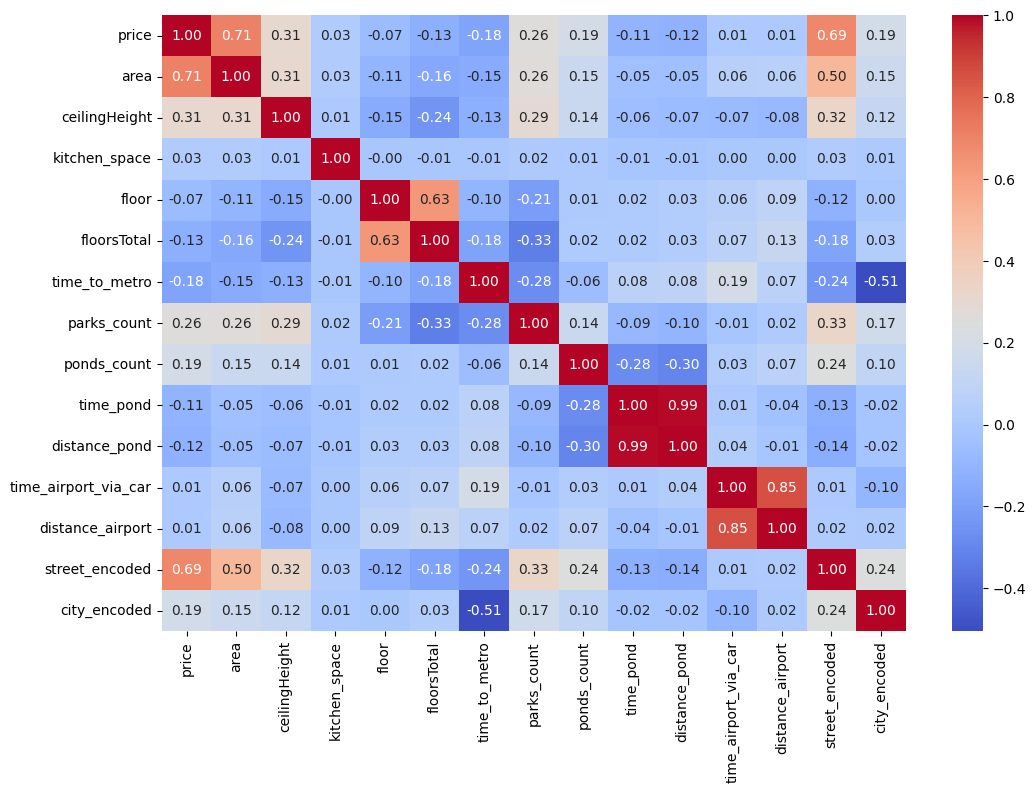

In [116]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [105]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

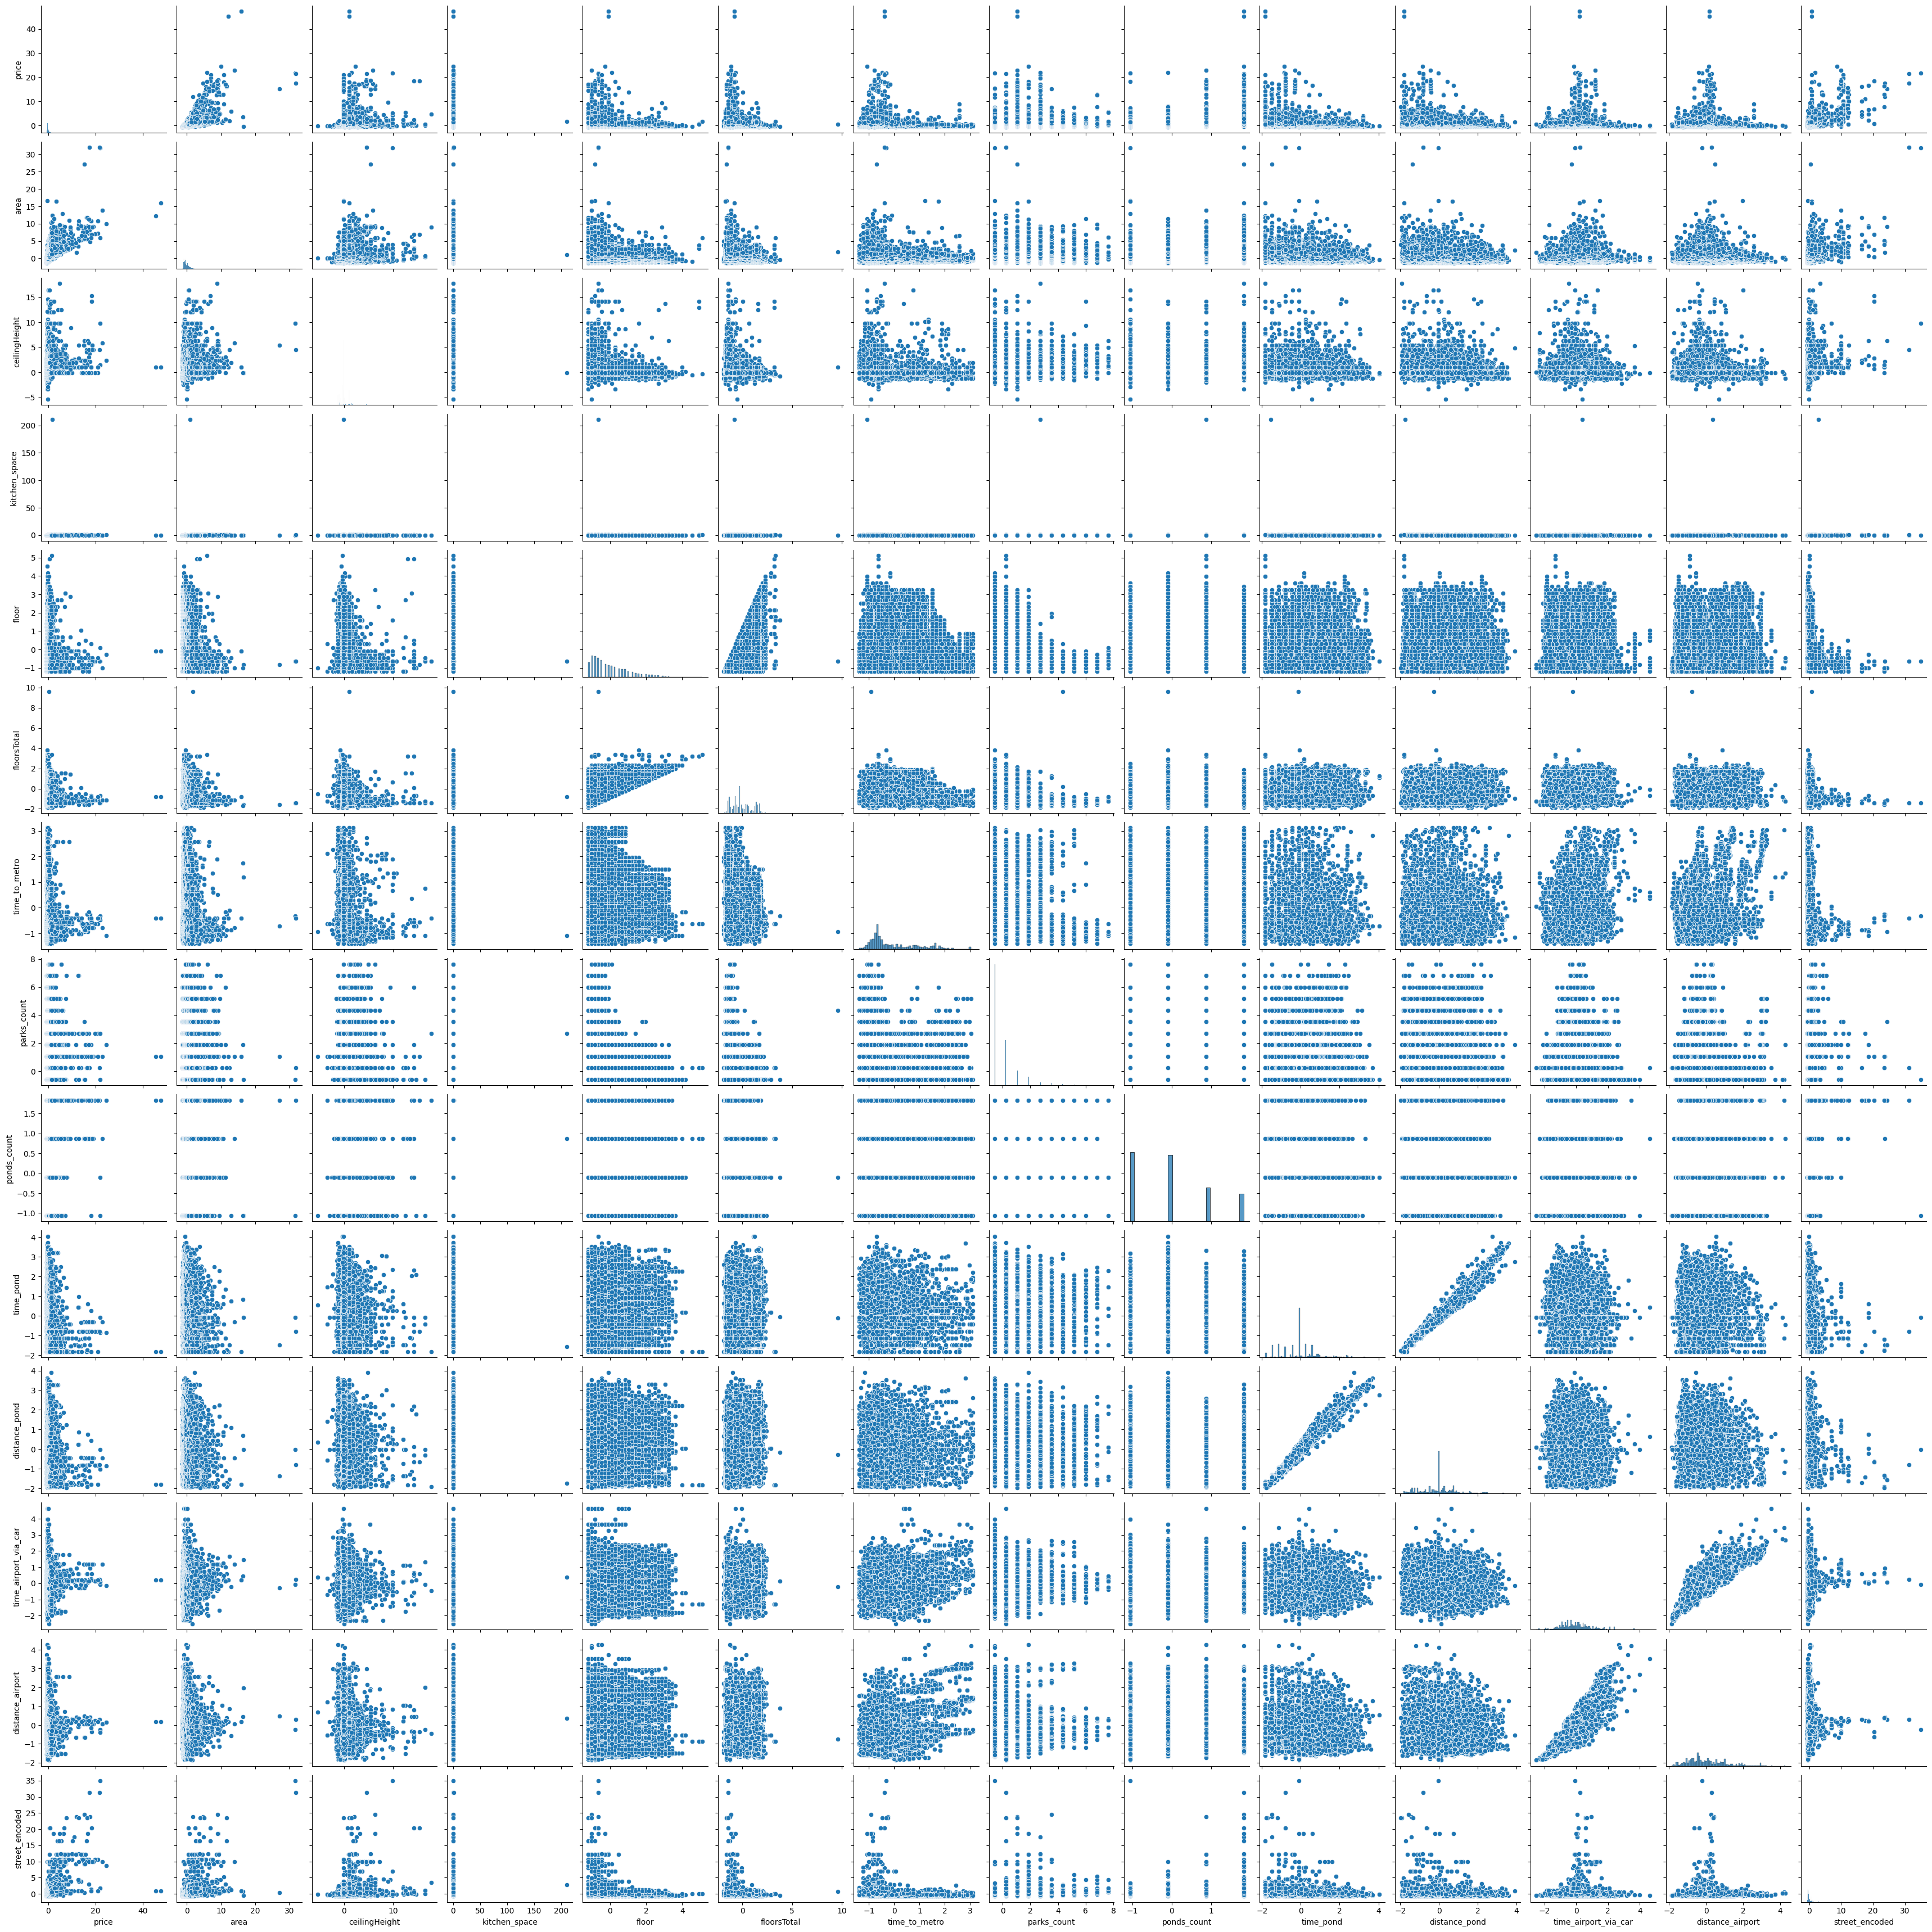

In [106]:
sns.pairplot(data_scaled)

В EDA.md - анализ